# Lecture 4 - Redes Neuronales

*  Link a los slides: http://bit.ly/WIDS_EMI_Lecture4
* Repositorio en GitHub: https://github.com/widslapaz/curso_data_science_version_2_emi
* Colab notebook: https://colab.research.google.com/drive/1OP2RNde-nQheteZmq0SBkAR9ypBHI6Y5



## 1. **Representaciones de datos para redes neuronales**

In [1]:
import numpy as np
x = np.array(12)

# Escalar - 0D tensor
print("Escalar")
print(x)
print(x.ndim) #number of axes
print(x.shape) #shape
print(x.dtype) #Data type

Escalar
12
0
()
int64


In [2]:
# Vectores - 1D tensor
x = np.array([3,4,2])
print(x)
print(x.ndim)
print(x.shape)
print(x.dtype)

[3 4 2]
1
(3,)
int64


In [3]:
# Matrix - 2D tensor
x = np.array([[2,5,2,5], [5,4,2,3],[6,23,4,566]])
print(x)
print(x.ndim)
print(x.shape)
print(x.dtype)


[[  2   5   2   5]
 [  5   4   2   3]
 [  6  23   4 566]]
2
(3, 4)
int64


In [4]:
# 3D tensor
x = np.array([
              [[2,5,2,5], [5,4,2,3],[6,2,4,566]],
              [[2,5,2,5], [5,4,2,3],[6,23,4,566]],
              [[2,4,2,5], [5,4,2,1],[2,3,4,5]]
    ])
print(x)
print(x.ndim)
print(x.shape)

[[[  2   5   2   5]
  [  5   4   2   3]
  [  6   2   4 566]]

 [[  2   5   2   5]
  [  5   4   2   3]
  [  6  23   4 566]]

 [[  2   4   2   5]
  [  5   4   2   1]
  [  2   3   4   5]]]
3
(3, 3, 4)


###Ejemplos de Tensores del mundo Real



*   Vectores - 2D Tensors (samples, features)
*   Timeseries - 3D Tensors (samples, timesteps, features) - Time axis is always the second one.
*   Imagenes - 4D Tensors (samples, height, width, channels) or (samples, channels, height, width)
*   Video - 5D Tensors (samples, frames, height, width, channels) or (samples, frames, channels, height, width)



## 2. **Hello World en Redes Neuronales**

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [6]:
# Cargamos el dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [7]:
# Revisemos los tensores en train
print(train_images.ndim)
print(train_images.shape)
print(len(train_labels))
print(train_labels.dtype)


3
(60000, 28, 28)
60000
uint8


In [8]:
# Revisemos los tensores en test
print(test_images.ndim)
print(test_images.shape)
print(len(test_labels))
print(test_images.dtype)

3
(10000, 28, 28)
10000
uint8


In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

###  **Visualizando los ejemplos del dataset**

In [10]:
import matplotlib.pyplot as plt

In [11]:
#@title Nro de Ejemplo a visualizar { run: "auto", vertical-output: true }
image_number = 87 #@param {type:"integer"}


In [12]:
train_labels[image_number]

9

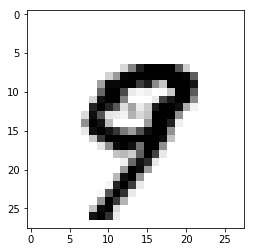

In [13]:
# Tensor Slicing = Seleccionar elementos específicos sobre el axis

digit = train_images[image_number]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

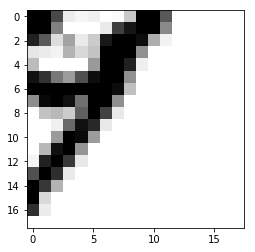

In [14]:
# Tensor Slicing = Seleccionar elementos específicos sobre el axis

digit = train_images[image_number, 10: , 10:]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

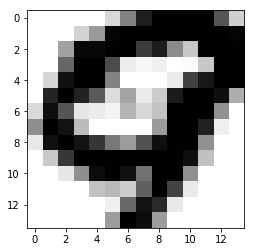

In [15]:
# Tensor Slicing = Seleccionar elementos específicos sobre el axis

digit = train_images[image_number, 7:-7 , 7:-7]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### **Data Batches**

In [16]:
# Deep Learning no procesa todos los datos de golpe
# Mas bien, se dividen los datos en trozos o batches
# Las divisiones se realizan sobre el primer axis (ndim)

batch = train_images[:128]
print(batch.shape)

(128, 28, 28)


In [17]:
# El siguiente batch
batch = train_images[128:256]

In [18]:
# Batch N
n = 5
batch_size = 128
batch = train_images[batch_size * n: batch_size * (n + 1)]
print(batch.shape)

(128, 28, 28)


###**Arquitectura inicial de Red Neuronal**

In [19]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


Vamos a compilar el modelo

 A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.  Nos permite medir los errore generados

 An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.

 Metrics to monitor during training and testing—Here, we’ll only care about accu- racy (the fraction of the images that were correctly classified).

In [20]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [21]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [23]:
from keras.utils import to_categorical
test_labels_bk = test_labels.copy()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [24]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.2650 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.1067 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0702 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0503 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.0363 - acc: 0.9892


Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data

In [25]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test_acc: 0.9763


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score
predictions = network.predict_classes(test_images)
pred_probs = network.predict_proba(test_images)


print("\nMatriz de confusion")
print(confusion_matrix(test_labels_bk, predictions, labels=range(0,10)))
print("\nAccuracy Score")
print(accuracy_score(test_labels_bk, predictions))


Matriz de confusion
[[ 972    0    1    2    1    1    1    1    1    0]
 [   0 1120    3    1    0    1    2    1    7    0]
 [   5    0 1005   10    2    0    1    4    5    0]
 [   0    0    0  999    0    1    0    3    2    5]
 [   0    0    5    0  956    0    3    2    1   15]
 [   3    0    0   27    2  850    4    1    4    1]
 [   4    2    2    2    7    4  933    0    4    0]
 [   1    3   10    3    0    0    0 1006    1    4]
 [   4    0    4   17    4    2    1    2  938    2]
 [   2    2    0    8    6    2    0    4    1  984]]

Accuracy Score
0.9763


## Ejercicios:

Realiza las siguientes pruebas y analiza los resultados:

1.   Adiciona nuevas hidden layers a la red neuronal. 
2.   Prueba con distintos números de neuronas en las nuevas capas que adiciones
3.   Cambia el algoritmo de optimización a ADAM
4.   Incrementa el número de epochs

Después de cada cambio, ejecuta nuevamente todas las celdas de la sección 2

